In [2]:
import numpy as np
from scipy import *
import sys
sys.path.append('../')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from xppcall import xpprun
import networkx as nx
import conley_functions as cf
import subprocess
import nolds
import scipy.optimize

####Set up network weights
a = 16
b = 12
d = 4
e = -2
W = np.array([[a, 0, -b, 0], [0, a, 0, -b],
              [a, 0, -d, 0], [0, a, 0, -d]]) 
N = W.shape[0]
ps = [-1,-1,-4,-4]

In [3]:
#make file to simulate Wilson-Cowan network with XPP
ksdm=-7
time=500
dt=0.05
P = 1
expn = 21
gamma = 10
Weights = []
datass = []
initss = []

for expi in  np.linspace(-10, 10, num=expn):
    Wp = np.zeros((N,N))
    Wp[0,-1] = ksdm
    Wp[1,-2] = ksdm
    Wp[2,-3] = ksdm
    Wp[3,-4] = ksdm
    Wp[0,1] = expi
    Wp[1,0] = expi
    Wp[2,3] = expi
    Wp[3,2] = expi
    Ws = W + Wp
    
    Weights.append(Ws)
#     wcstring = cf.make_wc(Ws, ps, dt=dt, inits=np.random.rand(N))
#     with open('wc_p.ode', 'w') as f:
#         f.writelines(wcstring)

#     datas = np.zeros((P, int(.1/dt)*time*10+1, N))
#     data_length_list = []
#     for j in range(P):
#         inits = np.random.rand(N)
#         initss.append(inits)
#         inits_dict={}
#         for i,init in enumerate(inits[:]):
#             inits_dict['x'+str(i+1)]=init
#         npa, vn = xpprun('wc_p.ode',inits=inits_dict, parameters={'total':time}, clean_after=True)
#         datas[j, :, :] = npa[:,1:].copy()
#         data_length_list.append(npa[:,1:].shape[0])
#     datass.append(datas)

In [4]:
# %matplotlib notebook
# colors = ['b', 'g', 'r', 'c', 'm', 'y']# c=colors[k+j%6],
# time=500
# shift=int((int(.1/dt)*time*10+1)*.5)
# til=int((int(.1/dt)*time*10+1)*.05)
# fig = plt.figure(figsize=(5,5))
# ax = fig.add_subplot(111, projection='3d')
# for j in range(0,expn):
#     for k in range(P):
# #         ax.plot(datass[j][k,shift:til,0], datass[j][k,shift:til,1], datass[j][k,shift:til,2], '.', label=r"$\lambda$="+str(j))#str(j)+':'+str(k))
#         ax.plot(datass[j][k,shift:,0], datass[j][k,shift:,1], datass[j][k,shift:,2], '.', label=r"$\lambda$="+str(j))#str(j)+':'+str(k))
#         plt.legend()
# plt.show()

In [5]:
# %matplotlib notebook
# plt.figure(figsize=(9,3))
# j=18
# # for j in range(31,32, 10):
# #     plt.plot(range(datass[j][0,shift:,0].shape[0]), datass[j][0,shift:,0])
# shift=int(20*time*0.5)
# plt.plot(range(datass[j][0,shift:,0].shape[0]), datass[j][0,shift:,0])
# plt.plot(range(datass[j][0,shift:,0].shape[0]), datass[j][0,shift:,1])
# # for i in range(10):
# #     plt.plot(range(datass[j][0,shift:,0].shape[0]), datass[j][0,shift:,i])
# plt.plot(range(datass[j][0,shift:,0].shape[0]), datass[j][0,shift:,2])
# plt.plot(range(datass[j][0,shift:,0].shape[0]), datass[j][0,shift:,3])

In [6]:
Ws=Weights[10]
time=20000
wcstring = cf.make_wc(Ws, ps, dt=0.01)
with open('wc_p.ode', 'w') as f:
    f.writelines(wcstring)
grid=cf.make_grid(4, 0.25, 0.75, 0.25)
grid=[[0,0,0,0]]
# grid=cf.make_grid(4, 0.2, 0.8, 0.2)
# grid=cf.make_grid(4, 0.2, 0.8, 0.1)
# grid=cf.make_grid(4, 0.0, 0.1, 0.25)

# grid=cf.make_grid(4, 0., 1, 1.)
P = len(grid)
print("P:",P,Ws)
datas = np.zeros((P, int(.5/dt)*time*10+1, N))
data_length_list = []
for j,gc in enumerate(grid):
    with open('wc_p.ode', 'w') as f:
        f.writelines(wcstring)
    inits_dict={}
    for i,init in enumerate(gc[:]):
        inits_dict['x'+str(i+1)]=init
    npa, vn = xpprun('wc_p.ode',inits=inits_dict, parameters={'total':time}, clean_after=True)
    datas[j, :, :] = npa[:,1:].copy()
    data_length_list.append(npa[:,1:].shape[0])

P: 1 [[ 16.   0. -12.  -7.]
 [  0.  16.  -7. -12.]
 [ 16.  -7.  -4.   0.]
 [ -7.  16.   0.  -4.]]


<IPython.core.display.Javascript object>


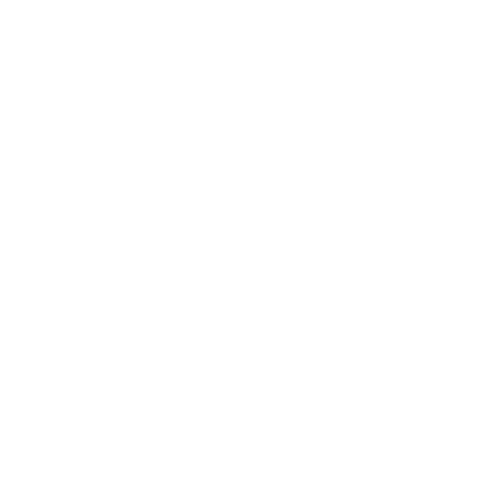

In [7]:
%matplotlib notebook
# time=1000
colors = ['b', 'g', 'r', 'c', 'm', 'y']# c=colors[k+j%6],
shift=int((int(.1/dt)*time*10+1)*.8)
til=int((int(.1/dt)*time*10+1)*1.)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
for k in range(P):
# i=0
# for k in range(10*i,10*(i+1)):
# for k in range(8,9):
#     print(k,grid[k])
    ax.plot(datas[k,shift:til,0], datas[k,shift:til,1], datas[k,shift:til,2], ',', label=r"$\lambda$="+str(k))#str(j)+':'+str(k))
#     ax.plot(datas[k,shift:,0], datas[k,shift:,1], datas[k,shift:,2], '.', label=r"$\lambda$="+str(k))#str(j)+':'+str(k))
#     plt.legend()
ax.set_xlabel('$X$', fontsize=20)
ax.set_ylabel('$Y$', fontsize=20)
ax.set_zlabel('$Z$', fontsize=20)
plt.show()

In [8]:
npa.shape

(2000001, 5)

In [9]:
#Poincare Section
shift = 20000
data = npa[shift:,1:]
x = 0.2
poincaresection = []
for i,point in enumerate(data[1:]):
#     print(np.sign(point[0]-x))
    if np.sign(data[i][0]-x) == -np.sign(data[i-1][0]-x):
#         print(point)
        poincaresection.append((data[i][1:]+data[i-1][1:])/2.)

In [10]:
poincaresection = np.array(poincaresection).T
poincaresection.shape

(3, 4726)

<IPython.core.display.Javascript object>


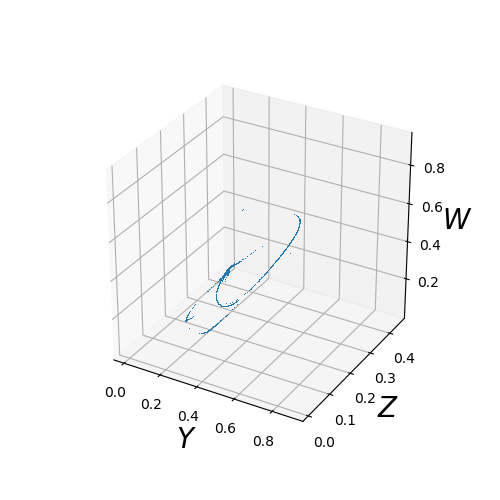

In [16]:
%matplotlib notebook
colors = ['b', 'g', 'r', 'c', 'm', 'y']# c=colors[k+j%6],
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot(poincaresection[0], poincaresection[1], poincaresection[2], ',')#str(j)+':'+str(k))
ax.set_xlabel('$Y$', fontsize=20)
ax.set_ylabel('$Z$', fontsize=20)
ax.set_zlabel('$W$', fontsize=20)
plt.show()

In [17]:
N0=poincaresection.T[np.where(poincaresection[-1]<0.1)].T
N1=poincaresection.T[np.where(poincaresection[-1]>0.1)].T

<IPython.core.display.Javascript object>


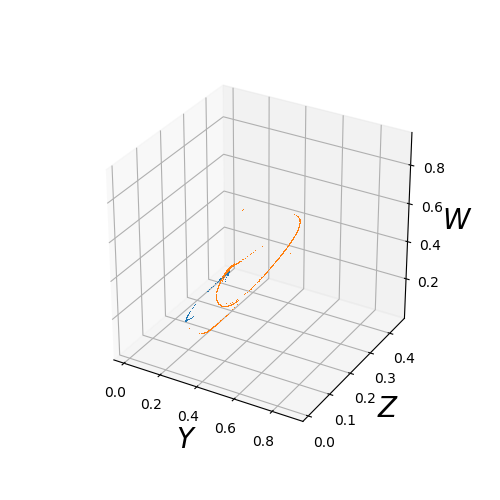

In [18]:
%matplotlib notebook
colors = ['b', 'g', 'r', 'c', 'm', 'y']# c=colors[k+j%6],
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot(N0[0], N0[1], N0[2], ',')
ax.plot(N1[0], N1[1], N1[2], ',')
ax.set_xlabel('$Y$', fontsize=20)
ax.set_ylabel('$Z$', fontsize=20)
ax.set_zlabel('$W$', fontsize=20)
plt.show()

In [19]:
# Ws=Weights[12]
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def F(x):
    return -x+sigmoid(Ws.dot(x)+np.array(ps))
x=scipy.optimize.broyden2(F, [.99]*4, f_tol=1e-15)
# cf.eval_wcode(x, Weights[0], ps), x, np.linalg.eig(cf.jac(x,Weights[0],ps))[0]
np.linalg.eig(cf.jac(x,Ws,ps))[0]

array([-0.63506827+0.j        , -0.42615509+0.j        ,
       -0.53061168+0.01298986j, -0.53061168-0.01298986j])

In [352]:
time=1000
Ws = Ws
wcstring = cf.make_wc(Ws, ps, dt=0.05)
with open('wc_p.ode', 'w') as f:
    f.writelines(wcstring)
data_length_list = []
sinits = [x,x+np.array([.0000001,.000000,.000000,0.00000]),
         x+np.array([.000000,.0000001,.000000,0.00000]),
         x+np.array([.000000,.000000,.0000001,0.00000]),
         x+np.array([.000000,.000000,.000000,0.000001]),
         x+np.array([.0000001,.0000001,.000000,0.00000]),
         x+np.array([.0000001,.000000,.0000001,0.00000]),
         x+np.array([.0000001,.000000,.000000,0.000001]),
         x+np.array([.000000,.0000001,.0000001,0.00000]),
         x+np.array([.000000,.000000,.0000001,0.000001]),
         x+np.array([.0000001,.0000001,.0000001,0.00000]),
         x+np.array([.0000001,.0000001,.000000,0.000001]),
         x+np.array([.0000001,.000000,.0000001,0.000001]),
         x+np.array([.0000001,.0000001,.0000001,0.000001])]
datas2 = np.zeros((len(sinits), int(.1/dt)*time*10+1, N))
for j,inits in enumerate(sinits):
    inits_dict={}
    for i,init in enumerate(inits[:]):
        inits_dict['x'+str(i+1)]=init
    npa, vn = xpprun('wc_p.ode',inits=inits_dict, parameters={'total':time}, clean_after=True)
    datas2[j, :, :] = npa[:,1:].copy()

<IPython.core.display.Javascript object>


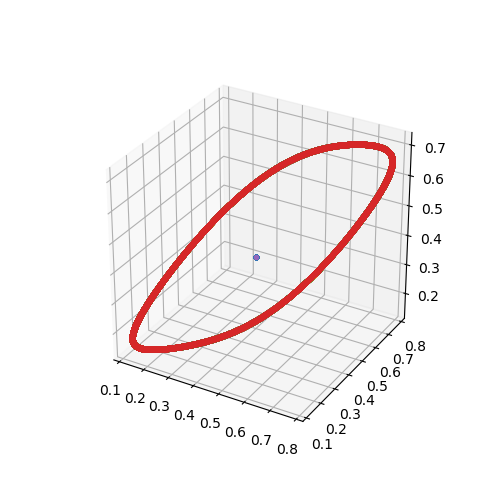

In [353]:
%matplotlib notebook
# time=500
shift=int((int(.1/dt)*time*10+1)*0.5)
til=int((int(.1/dt)*time*10+1)*.9)
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
for k in range(0,len(sinits)):
# for k in range(0,1):
#     ax.plot(datas2[k,shift:,0], datas2[k,shift:,1], datas2[k,shift:,2], '.', label=r"$\lambda$="+str(j))
    ax.plot(datas2[k,shift:til,0], datas2[k,shift:til,1], datas2[k,shift:til,2], '.', label=r"$\lambda$="+str(j))
ax.plot([x[0]],[x[1]],[x[2]],'.')
plt.show()

In [139]:
#Make combinatorial dynamical system from the data
shift=int(time*1.)
hdatas = np.array(datas).reshape(-1,N)#npa[:shift,1:]
hdatas = poincaresection.T
data_length_list = [poincaresection.shape[1]]
# hdatas = np.array(datass[7]).reshape(-1,N)
# hdatas = np.array(npa[:,1:]).reshape(-1,N)
# data_length_list = [npa[:,1:].shape[0]]
nbins = 2**5
delta = 1/nbins
print(delta)
cds = cf.Combinatorial_Dynamical_System(delta)
cds.get_cubesandgraph(hdatas[:,:], nbins, data_length_list, calc_matrix=True)

0.03125


In [140]:
#Get the recurrent components (Morse sets)
RCs = cds.get_recurrent_components(includeselfedges=False)
len(RCs)

1

<IPython.core.display.Javascript object>


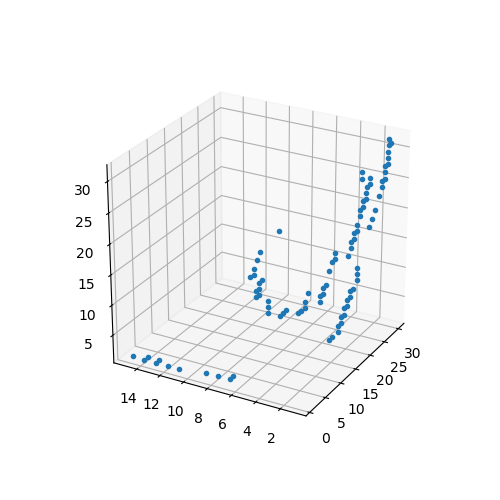

In [141]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
for i in range(len(RCs)):
    plt.plot((np.array(RCs[i])[:,0]-delta),(np.array(RCs[i])[:,1]-delta), (np.array(RCs[i])[:,2]-delta), '.', label=i+1)
plt.show()

In [142]:
# cds.G.remove_node((10,1, 15))
# cds.G.nodes()

<IPython.core.display.Javascript object>


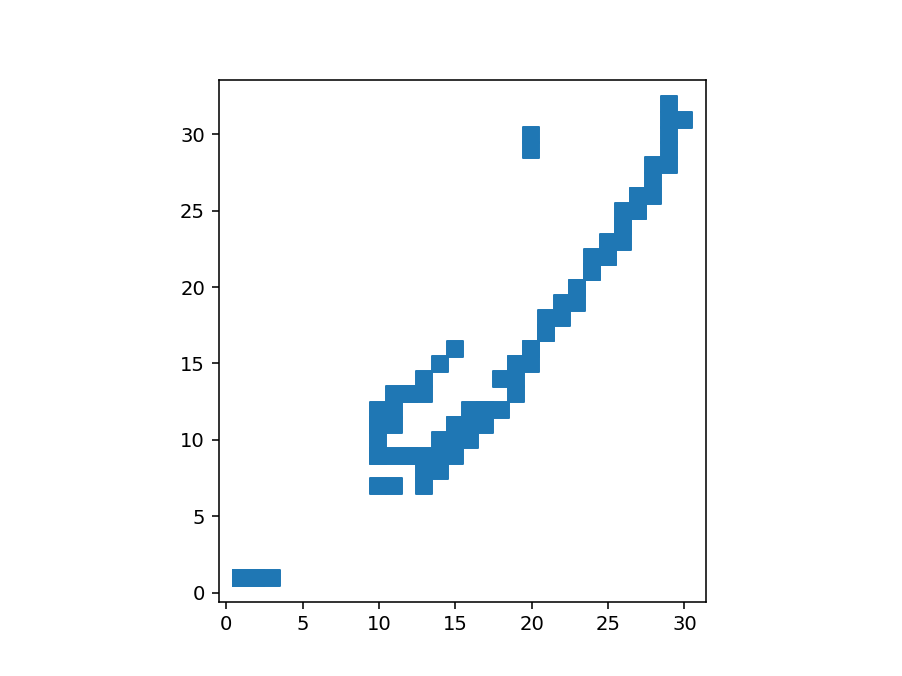

In [143]:
fig, ax = plt.subplots(dpi=141)
for i in range(len(RCs)):
    
    ax.set_aspect(1)
    fig.canvas.draw()
    s = max(1,((ax.get_window_extent().width * delta*72./fig.dpi) ** 2))  
    plt.scatter((np.array(RCs[i])[:,0]-delta), (np.array(RCs[i])[:,2]-delta), s=s, marker='s', label=i+1)
# plt.legend()
plt.show()

In [144]:
N0 = set()#[]
N1 = set()#[]
for g in cds.G.nodes:
#     print(g)
    if g[2]<2:
#         N0.append(g)
        N0.add(g)
    else:
#         N1.append(g)
        N1.add(g)

In [145]:
N0arr = np.array(list(N0))
N1arr = np.array(list(N1))

<IPython.core.display.Javascript object>


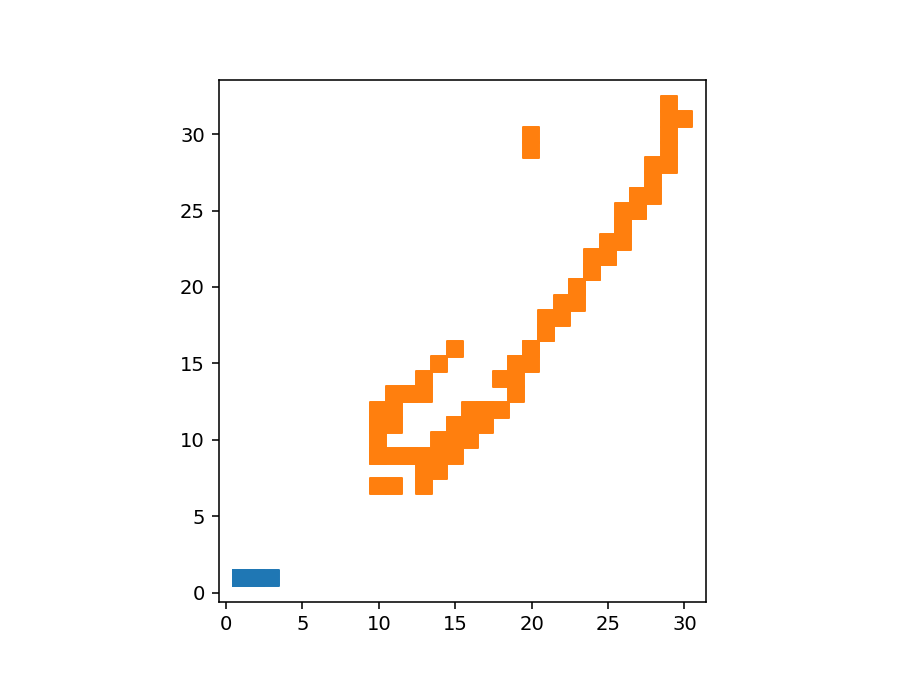

In [146]:
fig, ax = plt.subplots(dpi=141)
ax.set_aspect(1)
fig.canvas.draw()
s = max(1,((ax.get_window_extent().width * delta*72./fig.dpi) ** 2))  
plt.scatter((N0arr[:,0]-delta), (N0arr[:,2]-delta), s=s, marker='s', label=i+1)
plt.scatter((N1arr[:,0]-delta), (N1arr[:,2]-delta), s=s, marker='s', label=i+1)
# plt.legend()
plt.show()

In [148]:
fN0 = set()#[]
for g in N0:
    for e in list(cds.G.out_edges(g)):
#         print(g,e[0],e[1])
#         fN0.append(e[1])
        fN0.add(e[1])
N00 = N0
N00=N00.intersection(fN0)
cds.G.subgraph(N00).nodes()

fN1 = set()#[]
for g in N1:
    for e in list(cds.G.out_edges(g)):
#         print(e[1])
#         fN0.append(e[1])
        fN1.add(e[1])
N11 = N1
N11=N11.intersection(fN1)

N01 = N0
N01=N01.intersection(fN1)

N10 = N1
N10=N10.intersection(fN0)

In [149]:
NforS01 = N00
NforS01 = NforS01.union(N01)
NforS01 = NforS01.union(N11)

NforS10 = N11
NforS10 = NforS01.union(N10)
NforS10 = NforS01.union(N00)


<IPython.core.display.Javascript object>


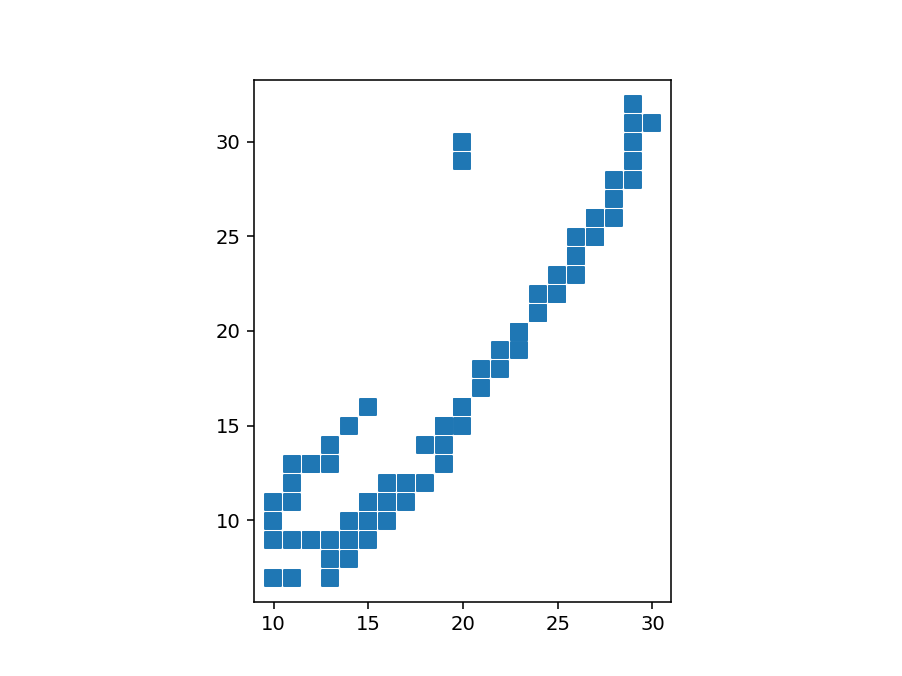

In [175]:
N00arr = np.array(list(N00))
N11arr = np.array(list(N11))
fig, ax = plt.subplots(dpi=141)
ax.set_aspect(1)
fig.canvas.draw()
s = max(1,((ax.get_window_extent().width * delta*72./fig.dpi) ** 2))  
# plt.scatter((N00arr[:,0]-delta), (N00arr[:,1]-delta), s=s, marker='s', label=i+1)
plt.scatter((N11arr[:,0]-delta), (N11arr[:,2]-delta), s=s, marker='s', label=i+1)
# plt.legend()
plt.show()

In [151]:
# fig, ax = plt.subplots(dpi=141)
# ax.set_aspect(1)
# fig.canvas.draw()
# s = max(1,((ax.get_window_extent().width * delta*72./fig.dpi) ** 2))  
# plt.scatter((N0arr[:,1]-delta), (N0arr[:,2]-delta), s=s, marker='s', label=i+1)
# plt.scatter((N1arr[:,1]-delta), (N1arr[:,2]-delta), s=s, marker='s', label=i+1)
# # plt.legend()
# plt.show()

In [174]:
Nbhd = list(N11)
S = cds.invariantPart(Nbhd)
S

{(10, 5, 9),
 (10, 6, 10),
 (10, 6, 11),
 (11, 5, 9),
 (11, 7, 12),
 (11, 7, 13),
 (12, 4, 9),
 (12, 5, 9),
 (12, 7, 13),
 (12, 8, 13),
 (13, 1, 7),
 (13, 1, 8),
 (13, 4, 9),
 (14, 1, 8),
 (14, 4, 9),
 (14, 4, 10),
 (15, 3, 10),
 (17, 1, 11),
 (17, 1, 12),
 (18, 1, 12),
 (19, 1, 13),
 (19, 1, 14),
 (19, 1, 15),
 (22, 2, 18),
 (22, 2, 19),
 (23, 1, 20),
 (23, 2, 19),
 (23, 2, 20),
 (24, 1, 21),
 (24, 2, 21),
 (24, 2, 22),
 (25, 1, 22),
 (25, 2, 22),
 (25, 2, 23),
 (26, 1, 24),
 (26, 2, 23),
 (26, 2, 24),
 (26, 2, 25),
 (27, 1, 25),
 (27, 1, 26),
 (27, 2, 25),
 (27, 2, 26),
 (28, 1, 26),
 (28, 1, 27),
 (28, 1, 28),
 (29, 1, 28),
 (29, 1, 29),
 (29, 1, 30),
 (29, 1, 31),
 (29, 1, 32),
 (30, 1, 31)}

In [176]:
#Get (isolated) neighbourhood (candidate) around recurrent set
Nbhd = list(N11)
print("Finding isolated nbhd")
S = cds.invariantPart(Nbhd)
M = cds.cubical_wrap(S).intersection(cds.G.nodes())

# for mstep in range(1):
#     M = cds.cubical_wrap(M).intersection(cds.G.nodes())

#calculate index pair
try:
    print("Calculating index pair")
    P1, P0, Pbar1, Pbar0 = cds.index_pair(M)

    #write index pairs to file for Conley index calcualtion with CHomP

    P1graph = nx.subgraph(cds.G, P1)
#     P1graph =cds.G
    cubefile, mapfile = cf.write_mapandcubes(P1graph, cds.delta, cds)
    with open('rc%s_P1_map.map'%(i+1), 'w') as f:
        f.writelines(mapfile)
    with open('rc%s_P1_cubes.cub'%(i+1), 'w') as f:
        f.writelines(cubefile)

    P0graph = nx.subgraph(cds.G, P0)
    cubefile, mapfile = cf.write_mapandcubes(P0graph, cds.delta, cds)
    with open('rc%s_P0_cubes.cub'%(i+1), 'w') as f:
        f.writelines(cubefile)

    print("Calculating homology")

#         proc = subprocess.Popen(['homcubes', '-i', 'rc%s_P1_map.map'%(i+1)],stdout=subprocess.PIPE)
#         proc = subprocess.Popen(['homcubes', '-i', 'rc%s_P1_cubes.cub'%(i+1), 'rc%s_P0_cubes.cub'%(i+1)],stdout=subprocess.PIPE)
    proc = subprocess.Popen(['homcubes', '-i',
                             'rc%s_P1_map.map'%(i+1), 
                             'rc%s_P1_cubes.cub'%(i+1),
                             'rc%s_P0_cubes.cub'%(i+1)], stdout=subprocess.PIPE)

    linenum = 0
#         print(proc.stdout.readlines())
    while True:
        line = proc.stdout.readline()
        if not line:
            break
#             print("           "+line.rstrip().decode('UTF-8'))
        if line.rstrip().decode('UTF-8')[0] in ['H', '	', 'D', 'F'] and not line.rstrip().decode('UTF-8')[1] == 'O':
#             if line.rstrip().decode('UTF-8')[0:2] == 'H_' or line.rstrip().decode('UTF-8')[0:2] == '  ' or line.rstrip().decode('UTF-8')[0:2] == 'Di':

            print("           "+line.rstrip().decode('UTF-8'))
        linenum+=1

except Exception as e:
    if e=='too many values to unpack (expected 4)':
        print('Faile')
    else:
        print(e)

Finding isolated nbhd
Calculating index pair
Calculating homology
           Forgetting 120 cells from B.
           H_0 = Z^2
           H_0 = 0
           H_1 = Z^2
           Dim 0:	f (x1) = 0
           	f (x2) = 0
           Dim 0:	i (x1) = 0
           	i (x2) = 0


In [172]:
mapfile

'(16, 1, 10) -> {}\n(16, 1, 11) -> {}\n(15, 1, 9) -> {}\n(13, 8, 14) -> {(15, 1, 9)}\n(14, 1, 9) -> {}\n(15, 4, 11) -> {}\n(21, 2, 17) -> {(14, 1, 9)}\n(11, 7, 11) -> {(15, 1, 9)}\n(21, 2, 18) -> {(14, 1, 9)}\n(13, 8, 13) -> {(15, 1, 9)}\n'

In [177]:
proc = subprocess.Popen(['homcubes', '-i',
                                 'rc%s_P1_map.map'%(i+1), 
#                                  'rc%s_P1_cubes.cub'%(i+1),
#                                  'rc%s_P0_cubes.cub'%(i+1)
                        ],
                                    stdout=subprocess.PIPE)

linenum = 0
while True:
    line = proc.stdout.readline()
    if not line:
        break
    print("           "+line.rstrip().decode('UTF-8'))
    linenum+=1

           HOMCUBES, ver. 3.07, 09/25/15. Copyright (C) 1997-2015 by Pawel Pilarczyk.
           This is free software. No warranty. Consult 'license.txt' for details.
           Reading the domain of the map from 'rc1_P1_map.map'... 61 cubes read.
           50000 bit fields allocated (0 MB) to speed up 3-dimensional reduction.
           Reducing full-dim cubes from X... .         0*         0 58 removed, 3 left.
           Note: The program assumes that the input map is acyclic.
           Reading the map on X from 'rc1_P1_map.map'... Done.
           Verifying if the image of X is contained in Y... Passed.
           Computing the image of the map... and of the inclusion... 9 cubes.
           Reducing full-dim cubes from Y... .         0*         0 51 removed, 10 left.
           Transforming X into cells... 3 cells added.
           Transforming Y into cells... 10 cells added.
           Collapsing faces in X... 3*.2*.1*. 78 rem

In [66]:
i=0
proc = subprocess.Popen(['homcubes', 'rc%s_P1_cubes.cub'%(i+1), 
                                    'rc%s_P0_cubes.cub'%(i+1)],
                                    stdout=subprocess.PIPE)

linenum = 0
while True:
    line = proc.stdout.readline()
    if not line:
        break
    print("           "+line.rstrip().decode('UTF-8'))
    linenum+=1

           HOMCUBES, ver. 3.07, 09/25/15. Copyright (C) 1997-2015 by Pawel Pilarczyk.
           This is free software. No warranty. Consult 'license.txt' for details.
           Note: The empty file 'rc1_P0_cubes.cub' is assumed to contain cubes.
           Reading cubes to X from 'rc1_P1_cubes.cub'... 21 cubes read.
           Reading cubes to A from 'rc1_P0_cubes.cub'... 0 cubes read.
           50000 bit fields allocated (0 MB) to speed up 3-dimensional reduction.
           Reducing full-dim cubes from X... .         0*         0 19 removed, 2 left.
           Transforming X into cells... 2 cells added.
           Collapsing faces in X... 3*.2*.1*. 52 removed, 2 left.
           Note: The dimension of X decreased from 3 to 0.
           Creating the chain complex of X... Done.
           Vertices used: 32 of dim 3.
           Time used so far: 0.00 sec (0.000 min).
           Computing the homology of X over the ring of integers...
           H_0 = Z^2